In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./train.csv')
train

,ID,Utterance,Speaker,Dialogue_ID,Target
0,TRAIN_0000,also I was the point person on my company’s tr...,Chandler,0,neutral
1,TRAIN_0001,You must’ve had your hands full.,The Interviewer,0,neutral
2,TRAIN_0002,That I did. That I did.,Chandler,0,neutral
3,TRAIN_0003,So let’s talk a little bit about your duties.,The Interviewer,0,neutral
4,TRAIN_0004,My duties? All right.,Chandler,0,surprise
...,...,...,...,...,...
9984,TRAIN_9984,You or me?,Chandler,1038,neutral
9985,TRAIN_9985,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,1038,neutral
9986,TRAIN_9986,"You guys are messing with me, right?",Joey,1038,surprise
9987,TRAIN_9987,Yeah.,All,1038,neutral


## EDA

/Users/parkjubro/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


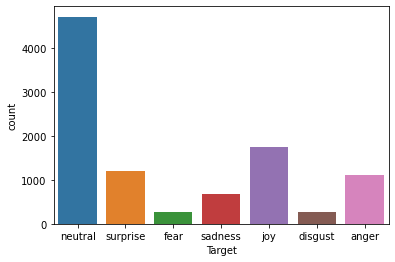

In [2]:
sns.countplot(train['Target'])
plt.show()

## 생각해본 것
#### 각 감정을 나타내는 텍스트마다 핵심 키워드가 존재할 것이다. 따라서 이를 추출하여 가중치를 부여하게 된다면 성능이 향상되지 않을까?
##### train data 중 'Target' 을 기준으로 나눠봄

In [3]:
t_fear = train[train['Target'] == 'fear']
t_fear

,ID,Utterance,Speaker,Dialogue_ID,Target
10,TRAIN_0010,No don’t I beg of you!,Chandler,0,fear
17,TRAIN_0017,"No, I-I-I-I don't, I actually don't know",Rachel,1,fear
129,TRAIN_0129,"Well, I-I got this blinding pain in my stomach...",Joey,12,fear
132,TRAIN_0132,"No way! ‘Kay look, if I have to go to the doct...",Joey,12,fear
178,TRAIN_0178,"Oh boy, I just can't watch. It's too scary!",Rachel,17,fear
...,...,...,...,...,...
9552,TRAIN_9552,"Oh please, he didn’t hear it! He didn’t hear it!!",Monica,997,fear
9736,TRAIN_9736,"Listen Ross, we ran out of gas, and we don’t k...",Phoebe,1016,fear
9762,TRAIN_9762,Oh no,Rachel,1018,fear
9768,TRAIN_9768,"All right, I promise. I’ll fix this. I swear. ...",Rachel,1018,fear


In [8]:
temp = t_fear['Utterance'].apply(len)
t_fear['length'] = temp
t_fear

/var/folders/qs/yvcwxy5j79g7gxngttx5yb5w0000gn/T/ipykernel_5522/3376565502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_fear['length'] = temp


,ID,Utterance,Speaker,Dialogue_ID,Target,length
10,TRAIN_0010,No don’t I beg of you!,Chandler,0,fear,22
17,TRAIN_0017,"No, I-I-I-I don't, I actually don't know",Rachel,1,fear,40
129,TRAIN_0129,"Well, I-I got this blinding pain in my stomach...",Joey,12,fear,147
132,TRAIN_0132,"No way! ‘Kay look, if I have to go to the doct...",Joey,12,fear,118
178,TRAIN_0178,"Oh boy, I just can't watch. It's too scary!",Rachel,17,fear,43
...,...,...,...,...,...,...
9552,TRAIN_9552,"Oh please, he didn’t hear it! He didn’t hear it!!",Monica,997,fear,49
9736,TRAIN_9736,"Listen Ross, we ran out of gas, and we don’t k...",Phoebe,1016,fear,92
9762,TRAIN_9762,Oh no,Rachel,1018,fear,5
9768,TRAIN_9768,"All right, I promise. I’ll fix this. I swear. ...",Rachel,1018,fear,78


In [177]:
t_fear[t_fear['Target'] == 'fear']['Utterance'].value_counts()

Uh-oh.                                                                                                                                         4
What am I going to do?                                                                                                                         2
No don’t I beg of you!                                                                                                                         1
No don’t! Go back to repeating!                                                                                                                1
No! Don’t say that! Don’t say that!                                                                                                            1
                                                                                                                                              ..
Oh, oh, oh, sorry.                                                                                                                

In [5]:
t_surprise = train[train['Target'] == 'surprise']
t_surprise

,ID,Utterance,Speaker,Dialogue_ID,Target
4,TRAIN_0004,My duties? All right.,Chandler,0,surprise
12,TRAIN_0012,Really?!,Chandler,0,surprise
14,TRAIN_0014,But then who? The waitress I went out with las...,Joey,1,surprise
16,TRAIN_0016,"No-no-no-no, no! Who, who were you talking about?",Joey,1,surprise
25,TRAIN_0025,No way!,Chandler,2,surprise
...,...,...,...,...,...
9951,TRAIN_9951,You're kidding right?,Joey,1036,surprise
9953,TRAIN_9953,What?!,Joey,1036,surprise
9975,TRAIN_9975,"Don’t tell me, because of the big nostril thing?",Ross,1038,surprise
9979,TRAIN_9979,How many perfectly fine women are you gonna re...,Monica,1038,surprise


In [176]:
t_surprise[t_surprise['Target'] == 'surprise']['Utterance'].value_counts()

What?                                                                              39
What?!                                                                             33
Really?                                                                            28
Really?!                                                                           12
Oh!                                                                                11
                                                                                   ..
Wh?! What about my allergies?!                                                      1
Sweety, what are you talking about?                                                 1
Whoa, wait, Pheebs, wait a second! Don’t you wanna stay here and talk about it?     1
Oh no!You guys aren't supposed to get divorced for 7 years!                         1
You guys are messing with me, right?                                                1
Name: Utterance, Length: 1006, dtype: int64

In [6]:
t_joy = train[train['Target'] == 'joy']
t_joy

,ID,Utterance,Speaker,Dialogue_ID,Target
23,TRAIN_0023,Do I ever.,Chandler,2,joy
31,TRAIN_0031,You betcha!,Chandler,2,joy
33,TRAIN_0033,"Um-mm, yeah right!",Chandler,2,joy
44,TRAIN_0044,Hi!,Ross,4,joy
51,TRAIN_0051,"Oh well, the woman I interviewed with was pret...",Rachel,4,joy
...,...,...,...,...,...
9938,TRAIN_9938,Hey!,Ross,1034,joy
9946,TRAIN_9946,Yes! Shame about you man.,Joey,1035,joy
9947,TRAIN_9947,Hey-hey! Stanley! Hey-hey! You're leading man ...,Joey,1036,joy
9972,TRAIN_9972,Hey!,All,1038,joy


In [175]:
t_joy[t_joy['Target'] == 'joy']['Utterance'].value_counts()

Hey!                                                                             45
Hi!                                                                              23
Yeah!                                                                            18
Okay!                                                                             8
Yes!                                                                              6
                                                                                 ..
This game is kinda fun.                                                           1
Okay, you picked the Gimmie card! You get all of Ross’s points!                   1
Y’know what? You’re just upset because you’re losing.                             1
Wait a minute, I-I believe I’m entitled to use my Angel Pass for a free turn?     1
That was a good one. For a second there, I was like, "whoa."                      1
Name: Utterance, Length: 1589, dtype: int64

In [14]:
temp = train['Utterance'].apply(len)
train['length'] = temp
train

,ID,Utterance,Speaker,Dialogue_ID,Target,length
0,TRAIN_0000,also I was the point person on my company’s tr...,Chandler,0,neutral,84
1,TRAIN_0001,You must’ve had your hands full.,The Interviewer,0,neutral,32
2,TRAIN_0002,That I did. That I did.,Chandler,0,neutral,23
3,TRAIN_0003,So let’s talk a little bit about your duties.,The Interviewer,0,neutral,45
4,TRAIN_0004,My duties? All right.,Chandler,0,surprise,22
...,...,...,...,...,...,...
9984,TRAIN_9984,You or me?,Chandler,1038,neutral,10
9985,TRAIN_9985,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,1038,neutral,51
9986,TRAIN_9986,"You guys are messing with me, right?",Joey,1038,surprise,36
9987,TRAIN_9987,Yeah.,All,1038,neutral,5


### 아래는 단어 길이 10 이하인 값들로 잘라서 확인해본 결과
-  'anger'의 경우 상대적으로 '!'의 사용이 많았다
- 파일 정리 때문에 불가피하게 다른 타겟들은 정리가 됐지만 'surprise'의 경우 '?'나 'what'이 많았던 것으로 기억한다.

In [25]:
sample[sample['Target'] == 'neutral']['Utterance'].value_counts()

Okay.         63
Yeah.         45
No.           36
Hey.          34
Hi.           29
              ..
Well you       1
With who?      1
Hi there.      1
Love           1
You or me?     1
Name: Utterance, Length: 369, dtype: int64

In [33]:
sample[sample['Target'] == 'anger']['Utterance'].value_counts()

No!           13
Fine!          7
Hey!           4
Come on!       4
Yeah!          3
              ..
Ow!            1
That’s it!     1
...Now         1
Who?           1
A week?        1
Name: Utterance, Length: 83, dtype: int64

### 핵심 키워드를 확인하기 위해 사용한 방법
- krwordrank를 사용하였다
- 키워드 분석 방법으로 문장 내에서 가장 핵심적인 단어를 뽑아낸다.
- 한글 wordrank이기도 하고 불용어 처리를 하지 않아 건저낸 것은 없는 듯 하다.

In [56]:
from krwordrank.sentence import summarize_with_sentences

texts = train['Utterance'].tolist()
# penalty = lambda x:0 if (10 <= len(x) <= 150) else 1
penalty = lambda x:0
# stopwords = {}

keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
#     stopwords = stopwords,
    diversity=0.5,
    num_keywords=100,
    num_keysents=10, # 키워드 분석을 통해 가장 핵심적인 문장들 뽑아내는 개수
    verbose=False
)
for word, r in sorted(keywords.items(), key = lambda x:x[1], reverse=True)[:30]:
                     print('%8s:\t%.4f' % (word, r))

     you:	92.3896
     the:	89.0751
      to:	68.4574
     and:	38.3221
      it:	28.6555
      my:	28.0179
      of:	27.4817
      Oh:	27.0729
      is:	26.4265
      be:	24.6422
      in:	24.1020
      we:	23.8788
      so:	23.7303
     I’m:	22.8749
     You:	22.3515
      do:	22.1038
      me:	21.2880
      he:	19.6405
     for:	19.4080
      go:	19.1680
      on:	18.8432
     not:	16.9289
     was:	16.2020
     are:	14.1479
     I'm:	13.6235
      ha:	13.4940
   Okay,:	12.9863
   Well,:	12.4011
     get:	11.2005
      wh:	11.0591


In [62]:
texts = train[train['Target'] == 'anger']['Utterance'].tolist()
penalty = lambda x:0 if (10 <= len(x) <= 150) else 1
penalty = lambda x:0
# stopwords = {}

keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
#     stopwords = stopwords,
    diversity=0.5,
    num_keywords=5,
    num_keysents=10, # 키워드 분석을 통해 가장 핵심적인 문장들 뽑아내는 개수
    verbose=False
)
for word, r in sorted(keywords.items(), key = lambda x:x[1], reverse=True)[:30]:
                     print('%8s:\t%.4f' % (word, r))

     you:	28.9145
     the:	21.6744
      to:	18.2684
     and:	10.4827
      it:	8.6174


## 결측치 확인
- Utterance의 단어 길이로 length 컬럼을 만들었다
- 각 타겟 별 단어 길이를 파악해봤고, 너무 짧은 단어들이 존재함을 확인했다.
- 이후 단어길이가 너무 짧은 단어들 중 이상치가 있는지 확인해봄

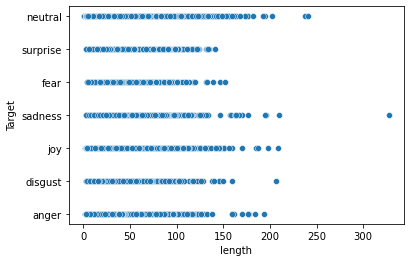

In [16]:
sns.scatterplot(x = train['length'], y = train['Target'], data = train)
plt.show()

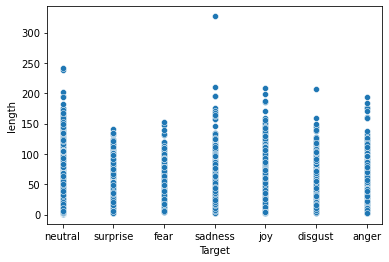

In [73]:
sns.scatterplot(x = train['Target'], y = train['length'], data = train)
plt.show()

In [83]:
sample = train[train['length'] <= 2]
sample.value_counts()

ID          Utterance  Speaker      Dialogue_ID  Target   length
TRAIN_0297  I          Chandler     29           neutral  1         1
TRAIN_0310  I          Paul         30           neutral  1         1
TRAIN_8306  I          Phoebe       873          neutral  1         1
TRAIN_6346  I          Monica       663          neutral  1         1
TRAIN_6117  It         Monica       645          neutral  2         1
TRAIN_5833  In         Phoebe       617          neutral  2         1
TRAIN_5639  I          Phoebe       599          neutral  1         1
TRAIN_5507  I          Monica       588          neutral  1         1
TRAIN_5470  I          Monica       583          neutral  1         1
TRAIN_4467  Eh         Chandler     478          neutral  2         1
TRAIN_4030  Hi         Mrs. Geller  435          neutral  2         1
TRAIN_3991  No         Joey         430          anger    2         1
TRAIN_3694  We         Ross         395          neutral  2         1
TRAIN_3513  !          Ro

In [103]:
sample

,ID,Utterance,Speaker,Dialogue_ID,Target,length
297,TRAIN_0297,I,Chandler,29,neutral,1
310,TRAIN_0310,I,Paul,30,neutral,1
1174,TRAIN_1174,I,Rachel,126,neutral,1
1278,TRAIN_1278,Is,Rachel,138,neutral,2
2423,TRAIN_2423,No,Phoebe,254,anger,2
2565,TRAIN_2565,I,Phoebe,272,neutral,1
3339,TRAIN_3339,Wh,Mona,351,joy,2
3513,TRAIN_3513,!,Ross,369,neutral,1
3694,TRAIN_3694,We,Ross,395,neutral,2
3991,TRAIN_3991,No,Joey,430,anger,2


### 단어들 중 No, Hi의 경우 단독으로 사용이 가능했기에 Dialogue에서 대화 흐름상 어울리는지 확인

In [110]:
train[train['Dialogue_ID'] == 254].value_counts()

ID          Utterance                            Speaker  Dialogue_ID  Target   length
TRAIN_2419  Phoebe, where's your purse?          Monica   254          fear     27        1
TRAIN_2420  No, no! Give it to me!               Monica   254          anger    22        1
TRAIN_2421  You can't have it.                   Phoebe   254          anger    18        1
TRAIN_2422  Give it to me!                       Monica   254          anger    14        1
TRAIN_2423  No                                   Phoebe   254          anger    2         1
TRAIN_2424  I'll go in there.                    Monica   254          anger    17        1
TRAIN_2425  Oh yeah.                             Phoebe   254          anger    8         1
TRAIN_2426  Phoebe come here                     Monica   254          neutral  16        1
TRAIN_2427  Haha!                                Monica   254          joy      5         1
TRAIN_2428  Damn you Monica Geller hyphen Bing!  Phoebe   254          anger    35   

In [148]:
check = []
check1 = []
temp = train['Utterance'].apply(len)
train['length'] = temp

for i in range(len(train)):
    if train['length'].loc[i] <= 2:
#         print(train['Utterance'].loc[i])
        if train['Utterance'].iloc[i] != 'Hi' and train['Utterance'].iloc[i] != 'No':
            check.append(train.index[i])
            check1.append(train['Utterance'].iloc[i])
train = train.drop(labels = check, axis = 0)
train

,ID,Utterance,Speaker,Dialogue_ID,Target,length
0,TRAIN_0000,also I was the point person on my company’s tr...,Chandler,0,neutral,84
1,TRAIN_0001,You must’ve had your hands full.,The Interviewer,0,neutral,32
2,TRAIN_0002,That I did. That I did.,Chandler,0,neutral,23
3,TRAIN_0003,So let’s talk a little bit about your duties.,The Interviewer,0,neutral,45
4,TRAIN_0004,My duties? All right.,Chandler,0,surprise,22
...,...,...,...,...,...,...
9984,TRAIN_9984,You or me?,Chandler,1038,neutral,10
9985,TRAIN_9985,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,1038,neutral,51
9986,TRAIN_9986,"You guys are messing with me, right?",Joey,1038,surprise,36
9987,TRAIN_9987,Yeah.,All,1038,neutral,5
